# Lotka-Voltera pure Julia

\begin{aligned}
{\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&= -\delta y-\gamma xy,
\end{aligned}

where,

* $x$ is the number of prey,
* $y$ is the number of predator,
* $\alpha$, $\beta$, $\gamma$, $\delta$ parameters describing the interaction between the species.

In [34]:
using DifferentialEquations
using BenchmarkTools
using Statistics

**Defining right-hand side**

In [35]:
function dudt(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = α*x - β*x*y
  du[2] = -δ*y + γ*x*y
end

dudt (generic function with 1 method)

**Initial conditions, parameters and time discretisation**

In [36]:
u0 = [1.0,1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1.0];
prob = ODEProblem(dudt,u0,tspan,p);

**Wrapping function to time**

In [37]:
function time_func()
    solve(prob, rtol = 1e-8, atol = 1e-8)
end

time_func (generic function with 1 method)

**Run 1e5 times and time**

In [38]:
t = @benchmark time_func()
mean(t)

BenchmarkTools.TrialEstimate: 
  time:             49.832 μs
  gctime:           8.207 μs (16.47%)
  memory:           43.70 KiB
  allocs:           493

**Result**

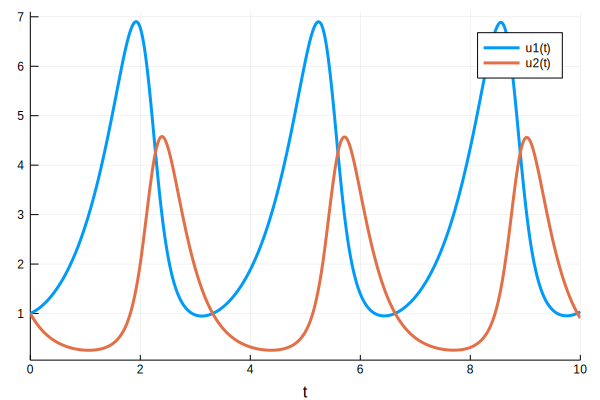

In [39]:
using Plots

sol = solve(prob, rtol = 1e-8, atol = 1e-8)
plot(sol)